The equation for the slope and y intercept a 2D regression line (where there are two independent variables) take takes the form of y = a + bx, where a is the y intercept and b is the slope.

a = ((Σy)(Σx^2) - (Σx)(Σxy)) / (n(Σx^2) - (Σx)^2)
b = (n(Σxy) - (Σx)(Σy)) / (n(Σx^2) - (Σx)^2)

The equation for the slope and y intercept a 2D regression line (where there are two independent variables) take takes the form of y = a + bx, where a is the y intercept and b is the slope.

a = ((Σy)(Σ))
b = (n())

2D Regression line calculation example:

In [127]:
class Point2D:
    def __init__(self,x,y):
        self.x = x
        self.y = y

class RegressionLine2D:
    def __init__(self,points):
        self.points = points
    
    # Returns an array [slope, yInt]
def calculate(line):
    sigmaX = 0.0
    sigmaY = 0.0
    sigmaXY = 0.0
    sigmaXSquared = 0.0
    sigmaYSquared = 0.0
    n = len(line.points)

    for i in line.points:
        sigmaX += i.x
        sigmaY += i.y
        sigmaXY += i.x * i.y
        sigmaXSquared += i.x ** 2
        sigmaYSquared += i.y ** 2
    
    yInt = ((sigmaY)*(sigmaXSquared) - (sigmaX)*(sigmaXY)) / (n*(sigmaXSquared) - (sigmaX) ** 2)
    slope = (n*(sigmaXY) - (sigmaX)*(sigmaY)) / (n*(sigmaXSquared) - (sigmaX) ** 2)
    return slope, yInt
    
def printEquation(line):
    slope, yInt = calculate(line)
    print("y = " + str(slope) + "x + (" + str(yInt) + ")")

a = Point2D(8,4)
b = Point2D(4,7)
c = Point2D(9,3)
d = Point2D(5,2)
e = Point2D(7,8)
f = Point2D(5,2)
line = RegressionLine2D([a,b,c,d,e,f])
printEquation(line)

aa = Point2D(1,8)
bb = Point2D(2,7)
cc = Point2D(3,9)
dd = Point2D(4,5)
ee = Point2D(5,6)
ff = Point2D(6,3)
line2 = RegressionLine2D([aa,bb,cc,dd,ee,ff])
printEquation(line2)

y = -0.08620689655172414x + (4.879310344827586)
y = -0.9142857142857143x + (9.533333333333333)


Matplotlib sin wave example:

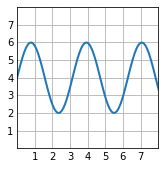

Text(0, 0.5, 'entry b')

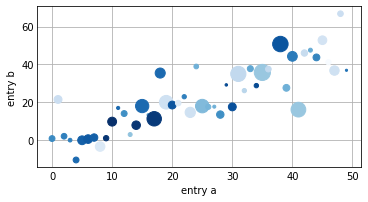

In [128]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# sin wave
x = np.linspace(0,10,100)
y = 4 + 2 * np.sin(2 * x)

fig, ax = plt.subplots()

ax.plot(x,y, linewidth=2.0)

ax.set(xlim=(0,8), xticks=np.arange(1,8), ylim=(0,8), yticks=np.arange(1,8))
plt.show()

# scatter plot
np.random.seed(1203912)
data = {
    'a': np.arange(50),
    'c': np.random.randint(0, 50, 50),
    'd': np.random.randn(50)
}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5,2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

Let's print out our regression line and points from earlier:

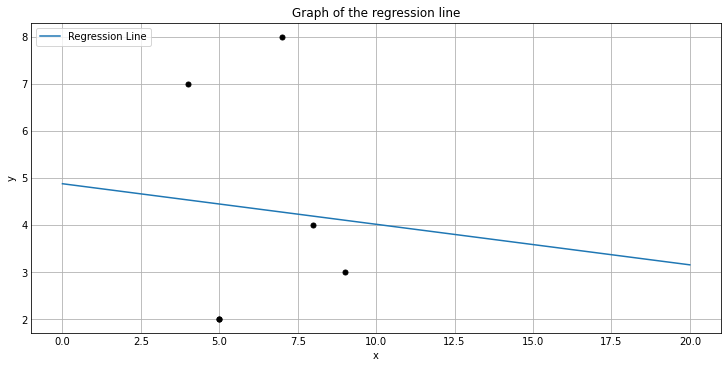

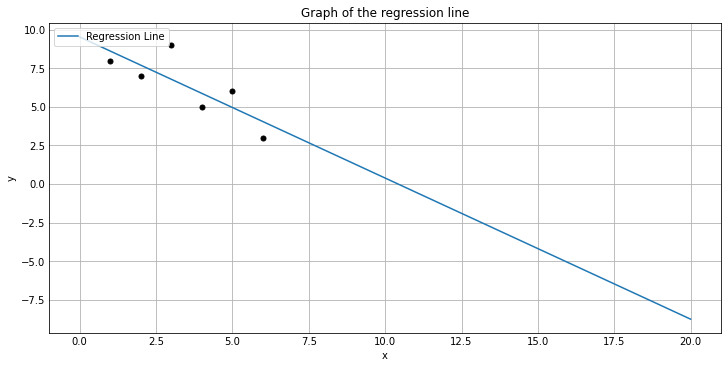

In [129]:
def graphLine(line, xAxisTitle="x", yAxisTitle="y", drawXTo = 20):
    slope, yInt = calculate(line)
    x = np.linspace(0,drawXTo,100)
    y = slope * x + yInt

    plt.figure(figsize=(10, 5), layout='constrained')
    plt.plot(x,y, label='Regression Line')
    for i in line.points:
        plt.plot(i.x, i.y, marker="o", markersize=5, markerfacecolor="black", markeredgecolor="black")
    plt.title('Graph of the regression line')
    plt.xlabel(xAxisTitle)
    plt.ylabel(yAxisTitle)
    plt.legend(loc='upper left')
    plt.show()

graphLine(line)
graphLine(line2)

Now let's try to build a model that (very loosely) aligns more to the user's tastes

Here's the process in brief:

There are a bunch of candidate objects. On instantiation, the candidate will be created with 7 political stances - 4 from the left and right stances, and 3 from genericPoliticalStances. A random leftRightScore between 0 and 100 will be generated that represents the proportion of the 4 left/right stances that are pulled from rightPoliticalStances - ie, a leftRightScore of 1 would mean that all 4 stances are pulled from rightPoliticalStances and a leftRightScore of 0 would have all 4 pulled from leftPoliticalStances.

The independent variables are the left-right scale and the swipability of each candidate

The user will complete an "onboarding" step by approving and disapproving of various candidates. Each candidate's positions will be shown, and (ideally) this will give us a chance to build a regression line for the user's beliefs.

After this "onboarding" is done, more candidates will be shown. We'll create a regression line with the onboarding candidate's

TODO: Rework this process: 1.) Onboarding user picks candidates 2.) Candidates are compared with social vs economic stance 3.) Regression line for all candidates the user liked

You will be asked whether you approve or disapprove of 10 different political candidates
Your answers will be in the form of a simple approve/disapprove
You can use whatever rationale you want to determine whether or not you approve the candidate as long as it remains mostly consistent between candidates
Press enter to begin:
Onboarding complete, percentLeft: 75
Equation:
y = -1.0x + (155.0)


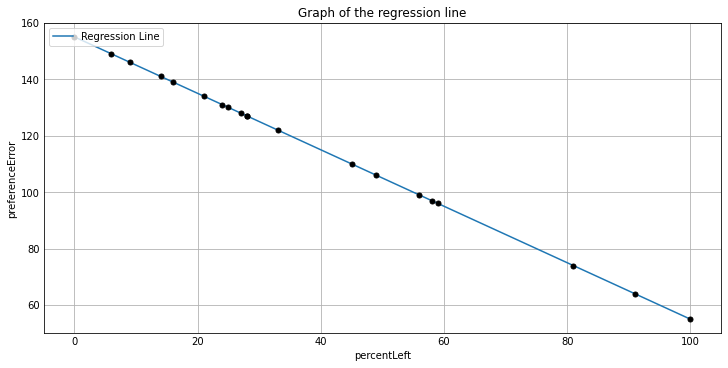

In [130]:
import random

# inb4 someone screams at me that "no true lefty/righty would support xyz!"
leftPoliticalStances = [
    "Expand the size and scope of government overall",
    "Lower the price of university, or make it completely free",
    "Universal single-payer healthcare",
    "Scale down the size of the military and withdraw from military engagements",
    "Make large scale reforms to local, state, and federal law enforcement agencies to address racism and police brutality",
    "Reform our immigration system to make it easier for foreigners to move here",
    "Raise the minimum wage",
    "Provide reparations for the descendants of people who experienced racial injustices",
    "Enshrine a woman's right to terminate their pregnancy in the law",
    "Expand environmental legislation to prevent climate change",
    "Enact gun control laws to curb armed violence",
    "Tax the rich to fund expanded government services"
]

rightPoliticalStances = [
    "Limit the size and scope of government overall",
    "Reduce government spending on welfare and cut benefits",
    "Introduce tariffs on foreign made goods to promote US industry",
    "Expand the military and its presence abroad",
    "Drain the swamp of corrupt Washington officials!",
    "Expand law enforcement agencies and increase criminal penalties for assaults on police officers",
    "Restrict or outlaw abortion in some or all cases",
    "Secure our border and limit immigration",
    "Provide school choice vouchers for parents who want to send their children to a private school",
    "Maintain the right of Americans to keep and bear arms",
    "Loosen environmental regulations",
    "Cut taxes for the richest Americans to allow their wealth to trickle down to the middle and working class"
]

genericPoliticalStances = [
    "Pass term limits for congressmen",
    "Increase funding for NASA",
    "Build a more expansive 5G and broadband network",
    "Pass new laws to regulate campaign finance",
    "Require that the President obtain a declaration of war before using nuclear weapons",
    "Provide universal preschool and kindergarten",
    "Pass more expansive data privacy legislation",
    "Expand funding for highway construction and maintenance"
]

candidateNames = [
    "Kyle",
    "Craig",
    "Judith",
    "Mark",
    "Carlton",
    "Michael",
    "Sage",
    "Max",
    "Averie",
    "Curtis",
    "Clark",
    "Eric",
    "Jennifer",
    "Beverly",
    "Julia",
    "Christopher",
    "William",
    "Cathleen",
    "Jennifer",
    "Raymond",
    "James",
    "Kenneth",
    "Richard",
    "Joshua",
    "Loraine",
    "Teresa",
    "Suzie"
]

def itemInList(item, list):
    for _ in list:
        if item in list:
            return True
    return False

# stances is the total possible stances (ie left/right/genericPoliticalStances)
def fillStanceTable(possibleStances, numStances):
    stances = []

    for _ in range(0,numStances):
        isDuplicate = True
        stance = ""

        while isDuplicate:
            stance = possibleStances[random.randint(0, len(possibleStances) - 1)]
            if not itemInList(stance, stances):
                isDuplicate = False

        stances.append(stance)
    
    return stances

class Candidate:
    def __init__(self, name, preferenceError = 0):
        self.name = name
        self.preferenceError = preferenceError
        self.percentLeft = random.randint(0,100)
        numLeft = 0
        # FIXME: There's a little bit of bias, since all politicians must have at least one left wing view,
        # but the inverse is not true (a totally left candidate is possible, but not a totally right candidate)
        if self.percentLeft < 25 : numLeft = 1 
        elif self.percentLeft < 50 : numLeft = 2
        elif self.percentLeft < 75 : numLeft = 3
        else: numLeft = 4
        self.stances = []
        self.stances.extend(fillStanceTable(leftPoliticalStances,numLeft))
        if numLeft != 4: self.stances.extend(fillStanceTable(rightPoliticalStances, 4 - numLeft))
        self.stances.extend(fillStanceTable(genericPoliticalStances, 3))


userLeftRightStance = 50

print("You will be asked whether you approve or disapprove of 10 different political candidates")
print("Your answers will be in the form of a simple approve/disapprove")
print("You can use whatever rationale you want to determine whether or not you approve the candidate as long as it remains "
+ "mostly consistent between candidates")
print("Press enter to begin:")
input()
print("\n\n\n")
for i in range(0,5):
    candidate = Candidate(candidateNames[random.randint(0, len(candidateNames) - 1)])
    print("Hello, my name is " + candidate.name + ", and here's what I stand for:")
    for c in candidate.stances:
        print(c)
    print("-----")
    print("Do you approve or disapprove of this candidate? (1/2)")
    approval = int(input()) swipability
    if approval == 1:
        userLeftRightStance = (userLeftRightStance + candidate.percentLeft) / 2.0
    print("\n\n\n")

userLeftRightStance = int(userLeftRightStance)
print("Onboarding complete, percentLeft: " + str(userLeftRightStance))

candidates = []
points = []

for i in range(0,20):
    candidate = Candidate(candidateNames[random.randint(0, len(candidateNames) - 1)])
    candidate.preferenceError = 80 + (userLeftRightStance - candidate.percentLeft)
    candidates.append(candidate)
    point = Point2D(candidate.percentLeft, candidate.preferenceError)
    points.append(point)


userLine = RegressionLine2D(points)
print("Equation:")
printEquation(userLine)
graphLine(userLine, "percentLeft", "preferenceError", 100)
